In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Load Dataset
df = pd.read_csv('./data_labelled1.csv')
df.head()

,book,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Removed those words that are not in the vcocabulary of buddhism book
dataset=df.loc[(df.sum(axis=1) != 0), (df.sum(axis=0) != 0)]
dataset

,book,feelings,saliva,open,supported,illumination,tell,neither,mentally,land,...,red,grows,abandons,well,production,whitened,developed,shots,turner,thoughts
0,Buddhism_Ch1,0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Buddhism_Ch6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Buddhism_Ch7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Buddhism_Ch8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Buddhism_Ch9,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,Buddhism_Ch10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Set x and y variable
x = dataset.drop('book', axis=1).values
y = dataset['book']

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
data_transformed=sc.transform(x)

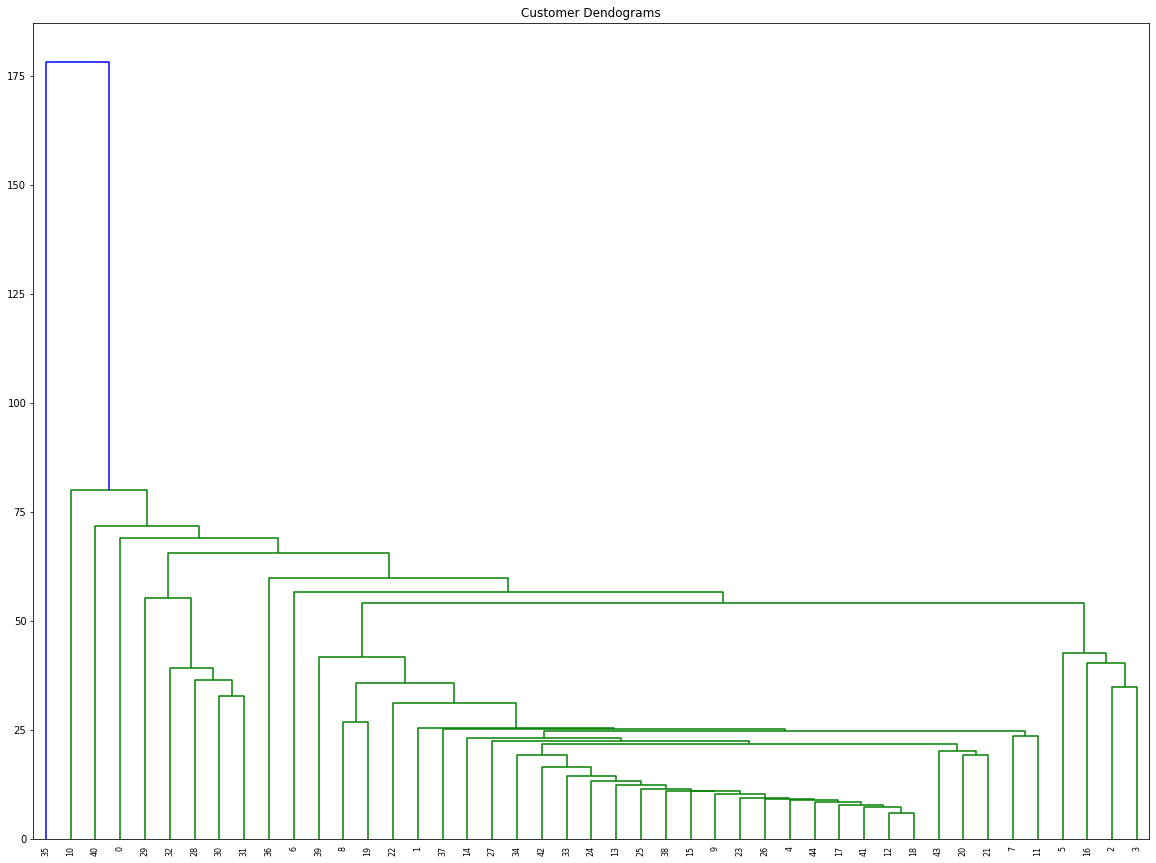

In [5]:
#Plot Denogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 15))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))  